In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [79]:
transform = transforms.ToTensor()

In [80]:
train_data = datasets.CIFAR10(root='../Datasets', train=True, download=True, transform=transform)

Files already downloaded and verified


In [81]:
test_data = datasets.CIFAR10(root='../Datasets', train=False, download=True, transform=transform)

Files already downloaded and verified


In [82]:
torch.manual_seed(101)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [83]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../Datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [84]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [85]:
for images, labels in train_loader:
    break

In [86]:
labels

tensor([9, 5, 2, 3, 0, 5, 9, 5, 1, 6])

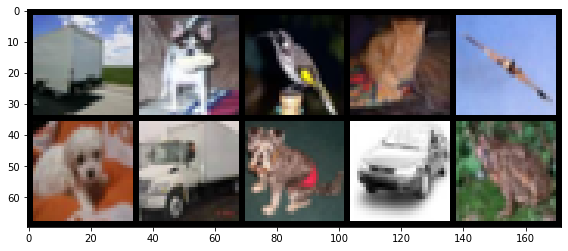

In [87]:
im = make_grid(images, nrow=5)
plt.figure(figsize=(10, 4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [88]:
class ConvulationalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16*6*6)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [89]:
torch.manual_seed(101)
model = ConvulationalNetwork()

In [90]:
model

ConvulationalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [91]:
for param in model.parameters():
    print(param.numel())

450
6
864
16
69120
120
10080
84
840
10


In [92]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [117]:
epochs = 10

losses = []
tr_losses = []
te_losses = []

for i in range(epochs):
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        if b%600 == 0:
            print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')
    tr_losses.append(loss)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            b += 1

            y_pred = model(X_test)
            loss = criterion(y_pred, y_test)
            predicted = torch.max(y_pred.data, 1)[1]
    te_losses.append(loss)
    

Epoch: 0  Batch: 600  Loss: 2.2951340675354004
Epoch: 0  Batch: 1200  Loss: 2.275617837905884
Epoch: 0  Batch: 1800  Loss: 2.303412914276123
Epoch: 0  Batch: 2400  Loss: 2.318784236907959
Epoch: 0  Batch: 3000  Loss: 2.3143951892852783
Epoch: 0  Batch: 3600  Loss: 2.3106589317321777
Epoch: 0  Batch: 4200  Loss: 2.2957842350006104
Epoch: 0  Batch: 4800  Loss: 2.2967121601104736
Epoch: 1  Batch: 600  Loss: 2.3086962699890137
Epoch: 1  Batch: 1200  Loss: 2.3318803310394287
Epoch: 1  Batch: 1800  Loss: 2.3046116828918457
Epoch: 1  Batch: 2400  Loss: 2.334301233291626
Epoch: 1  Batch: 3000  Loss: 2.3079183101654053
Epoch: 1  Batch: 3600  Loss: 2.2804863452911377
Epoch: 1  Batch: 4200  Loss: 2.3369059562683105
Epoch: 1  Batch: 4800  Loss: 2.334958076477051
Epoch: 2  Batch: 600  Loss: 2.2894129753112793
Epoch: 2  Batch: 1200  Loss: 2.3419318199157715
Epoch: 2  Batch: 1800  Loss: 2.2682573795318604
Epoch: 2  Batch: 2400  Loss: 2.2817225456237793
Epoch: 2  Batch: 3000  Loss: 2.312316656112671
E

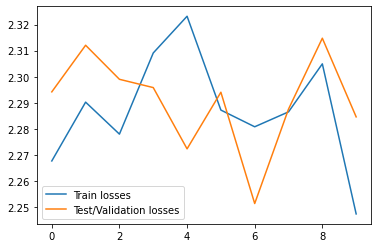

In [118]:
plt.plot(tr_losses, label='Train losses')
plt.plot(te_losses, label='Test/Validation losses')
plt.legend()

In [115]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [119]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_pred = model(X_test)
        predicted = torch.max(y_pred.data, 1)[1]
        print(torch.max(y_pred.data, 1)[1])
        print(y_test)
        correct = (predicted == y_test).sum()

tensor([7, 7, 7,  ..., 7, 7, 7])
tensor([3, 8, 8,  ..., 5, 1, 7])


In [120]:
correct / 10000

tensor(0.1000)